**TA:**
* Think about how we can generate new features or new insightful informations that are/might be usefull

**Notes about the dataset:**
* There are 15 different Cuisines 
    * Cluster over Cusines
* Different days and hours of the day
    * Clustering over hours/days to create coupons 


**New features:**
1. CUI notes monetary units --> create new feature with money spend
2. Sum up DOW to get sum of orders
3. Frequency of orders  = Sum of orders dividided by 90 days
4. Money spent per order
5. 

### Import packages 

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="color:green"> Part 1 -  Data loading and Preprocessing </span> 

## Read in Data



Data description:

<img src="Guideline&Templates/dataset_description.png" alt="Sample Image" width="500" height="700">

## Quick look at the data

In [2]:
# read in data | set customer_id as index 
df = pd.read_csv('Data/DM2425_ABCDEats_DATASET.csv', index_col='customer_id')
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [3]:
# print dimensions of df with text 
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.describe()

The dataset has 31888 rows and 55 columns


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [4]:
# print out the unique values of customer_region, last_promo, payment_method
print('Unique values of customer_region:', df['customer_region'].unique())
print('Unique values of last_promo:', df['last_promo'].unique())
print('Unique values of payment_method:', df['payment_method'].unique())
df.describe(include='object').T

Unique values of customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
Unique values of last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values of payment_method: ['DIGI' 'CASH' 'CARD']


,count,unique,top,freq
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [5]:
# Check info for all columns that do not contain HR, DOW, CUI
df[[column for column in df.columns if all(x not in column for x in ["HR", "DOW", "CUI"])]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_region  31888 non-null  object 
 1   customer_age     31161 non-null  float64
 2   vendor_count     31888 non-null  int64  
 3   product_count    31888 non-null  int64  
 4   is_chain         31888 non-null  int64  
 5   first_order      31782 non-null  float64
 6   last_order       31888 non-null  int64  
 7   last_promo       31888 non-null  object 
 8   payment_method   31888 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4+ MB


There are some missing values in first_order, last_order and customer_age

In [6]:
round(df['customer_age'].mean(skipna=True))

28

In [7]:
# supress warnings for this cell
import warnings
warnings.filterwarnings('ignore')

# check unique values for customer_age
print('Unique values of customer_age:', df['customer_age'].unique())

# they are all int or nan values so we can convert from float to int 
df['customer_age'] = df['customer_age'].astype('Int64')
# fill missing values with the mean of the column
df["customer_age"].fillna(round(df['customer_age'].mean(skipna=True)), inplace=True)


Unique values of customer_age: [18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]


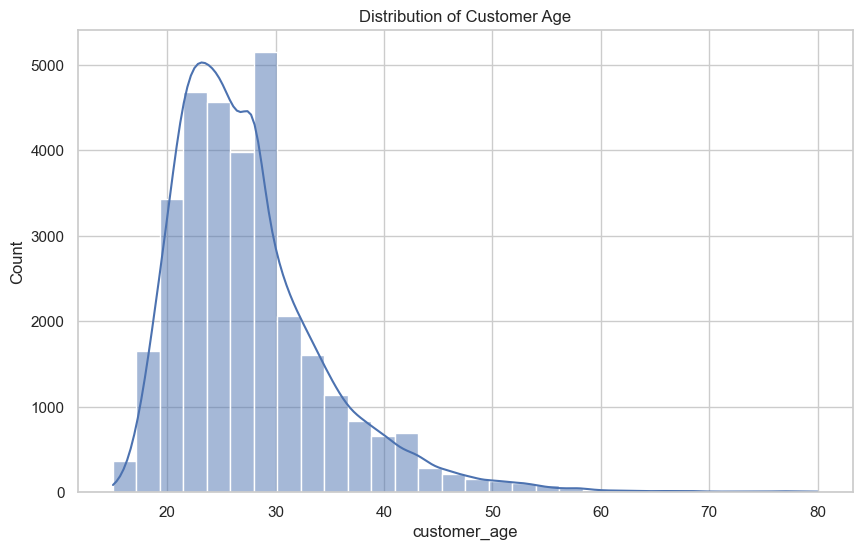

In [8]:
# this is now distorted because of the missing values that were filled with the mean !!!!!
# distribution of customer_age
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()


In [9]:
# check info for all columns that contain HR and DOW
df[[column for column in df.columns if any(x in column for x in [ "DOW", "CUI"])]].info()

# no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUI_American              31888 non-null  float64
 1   CUI_Asian                 31888 non-null  float64
 2   CUI_Beverages             31888 non-null  float64
 3   CUI_Cafe                  31888 non-null  float64
 4   CUI_Chicken Dishes        31888 non-null  float64
 5   CUI_Chinese               31888 non-null  float64
 6   CUI_Desserts              31888 non-null  float64
 7   CUI_Healthy               31888 non-null  float64
 8   CUI_Indian                31888 non-null  float64
 9   CUI_Italian               31888 non-null  float64
 10  CUI_Japanese              31888 non-null  float64
 11  CUI_Noodle Dishes         31888 non-null  float64
 12  CUI_OTHER                 31888 non-null  float64
 13  CUI_Street Food / Snacks  31888 non-null  float64
 1

In [10]:
# check info for HR columns
df[[column for column in df.columns if "HR" in column]].info()
# there are missing values in HR_0
# HR_0 column is type float


<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR_0    30723 non-null  float64
 1   HR_1    31888 non-null  int64  
 2   HR_2    31888 non-null  int64  
 3   HR_3    31888 non-null  int64  
 4   HR_4    31888 non-null  int64  
 5   HR_5    31888 non-null  int64  
 6   HR_6    31888 non-null  int64  
 7   HR_7    31888 non-null  int64  
 8   HR_8    31888 non-null  int64  
 9   HR_9    31888 non-null  int64  
 10  HR_10   31888 non-null  int64  
 11  HR_11   31888 non-null  int64  
 12  HR_12   31888 non-null  int64  
 13  HR_13   31888 non-null  int64  
 14  HR_14   31888 non-null  int64  
 15  HR_15   31888 non-null  int64  
 16  HR_16   31888 non-null  int64  
 17  HR_17   31888 non-null  int64  
 18  HR_18   31888 non-null  int64  
 19  HR_19   31888 non-null  int64  
 20  HR_20   31888 non-null  int64  
 21  HR_21   31888 non-null  in

In [11]:
# Check unique values for HR_0
df['HR_0'].unique()


array([ 0., nan])

In [12]:
# all values of HR_0 are either 0 or nan --> replace nan with 0
df['HR_0'].fillna(0, inplace=True)

# from float to int
df['HR_0'] = df['HR_0'].astype(int)


###  Cusines columns

In [13]:
print("There are: ", len([column for column in df.columns if "CUI" in column ]), "columns with CUI in the name")

# create a new column that sums up the money spend 
df["money_spend"] = df[[column for column in df.columns if "CUI" in column ]].sum(axis= 1)

# look at the columns
df[["money_spend"] + [column for column in df.columns if "CUI" in column ] ].head()

There are:  15 columns with CUI in the name


,money_spend,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,28.88,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,19.21,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,9.20,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
180c632ed8,31.56,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0
4eb37a6705,55.44,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


###  Day of the Week columns

In [14]:
df[[column for column in df.columns if "DOW" in column ]].head()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_id,,,,,,,
1b8f824d5e,1,0,0,0,0,0,1
5d272b9dcb,1,0,0,0,0,0,1
f6d1b2ba63,1,0,0,0,0,0,1
180c632ed8,0,1,0,0,0,0,1
4eb37a6705,0,1,0,0,0,0,1


###  Daily hours columns

In [15]:
df[[column for column in df.columns if "HR" in column ]].head()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# print dimensions of df with text 
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.describe()

The dataset has 31888 rows and 56 columns


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spend
count,31888.0,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.51775,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189,38.303043
std,7.079179,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006,46.412121
min,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.0,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.887500
50%,26.0,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.140000
75%,31.0,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.990000
max,80.0,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000,1418.330000


In [17]:
# print out the unique values of customer_region, last_promo, payment_method
print('Unique values of customer_region:', df['customer_region'].unique())
print('Unique values of last_promo:', df['last_promo'].unique())
print('Unique values of payment_method:', df['payment_method'].unique())
df.describe(include='object').T


Unique values of customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
Unique values of last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values of payment_method: ['DIGI' 'CASH' 'CARD']


,count,unique,top,freq
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


## Visualizations

#### Distribution of columns 

In [18]:
# create a dictionary with the sum of orders for each day of the week
day_of_order_dict = {"sum_" + column: sum(df[column]) for column in df.columns if "DOW" in column}



# written with help of Copilot (GPT-4o)
# rename the key values of dictionary to the actual day of the week sum_DOW_0 -> Sunday, sum_DOW_1 -> Monday, etc.
day_of_order_dict = {'Monday': day_of_order_dict['sum_DOW_1'], 'Tuesday': day_of_order_dict['sum_DOW_2'], 
                     'Wednesday': day_of_order_dict['sum_DOW_3'], 'Thursday': day_of_order_dict['sum_DOW_4'], 'Friday': day_of_order_dict['sum_DOW_5'], 
                     'Saturday': day_of_order_dict['sum_DOW_6'], 'Sunday': day_of_order_dict['sum_DOW_0']}

# create a DataFrame from the dictionary
day_of_order_distribution = pd.DataFrame(list(day_of_order_dict.items()), columns=['day_of_the_week', 'Value'])
day_of_order_distribution

,day_of_the_week,Value
0,Monday,18096
1,Tuesday,18846
2,Wednesday,19753
3,Thursday,21612
4,Friday,20822
5,Saturday,22457
6,Sunday,17727


In [25]:
# create a dictionary with the sum of orders for each day of the week
hour_of_order_dict = {"sum_" + column: sum(df[column]) for column in df.columns if "HR" in column}



# written with help of Copilot (GPT-4o)
# rename the key values of dictionary to the actual hour of the day sum_HR_0 -> 0am, sum_HR_1 -> 1am, sum_HR_2, sum_HR_23 etc.
hour_of_order_dict = {'0am': hour_of_order_dict['sum_HR_0'], 
'1am': hour_of_order_dict['sum_HR_1'], 
'2am': hour_of_order_dict['sum_HR_2'], 
'3am': hour_of_order_dict['sum_HR_3'], 
'4am': hour_of_order_dict['sum_HR_4'], 
'5am': hour_of_order_dict['sum_HR_5'], 
'6am': hour_of_order_dict['sum_HR_6'], 
'7am': hour_of_order_dict['sum_HR_7'], 
'8am': hour_of_order_dict['sum_HR_8'], 
'9am': hour_of_order_dict['sum_HR_9'], 
'10am': hour_of_order_dict['sum_HR_10'], 
'11am': hour_of_order_dict['sum_HR_11'], 
'12pm': hour_of_order_dict['sum_HR_12'], 
'1pm': hour_of_order_dict['sum_HR_13'], 
'2pm': hour_of_order_dict['sum_HR_14'], 
'3pm': hour_of_order_dict['sum_HR_15'], 
'4pm': hour_of_order_dict['sum_HR_16'], 
'5pm': hour_of_order_dict['sum_HR_17'], 
'6pm': hour_of_order_dict['sum_HR_18'], 
'7pm': hour_of_order_dict['sum_HR_19'], 
'8pm': hour_of_order_dict['sum_HR_20'], 
'9pm': hour_of_order_dict['sum_HR_21'], 
'10pm': hour_of_order_dict['sum_HR_22'], 
'11pm': hour_of_order_dict['sum_HR_23']}

# create a DataFrame from the dictionary
hour_of_order_distribution = pd.DataFrame(list(hour_of_order_dict.items()), columns=['hour_of_the_day', 'Value'])
hour_of_order_distribution.head()


,hour_of_the_day,Value
0,0am,0
1,1am,1717
2,2am,2015
3,3am,3787
4,4am,3243


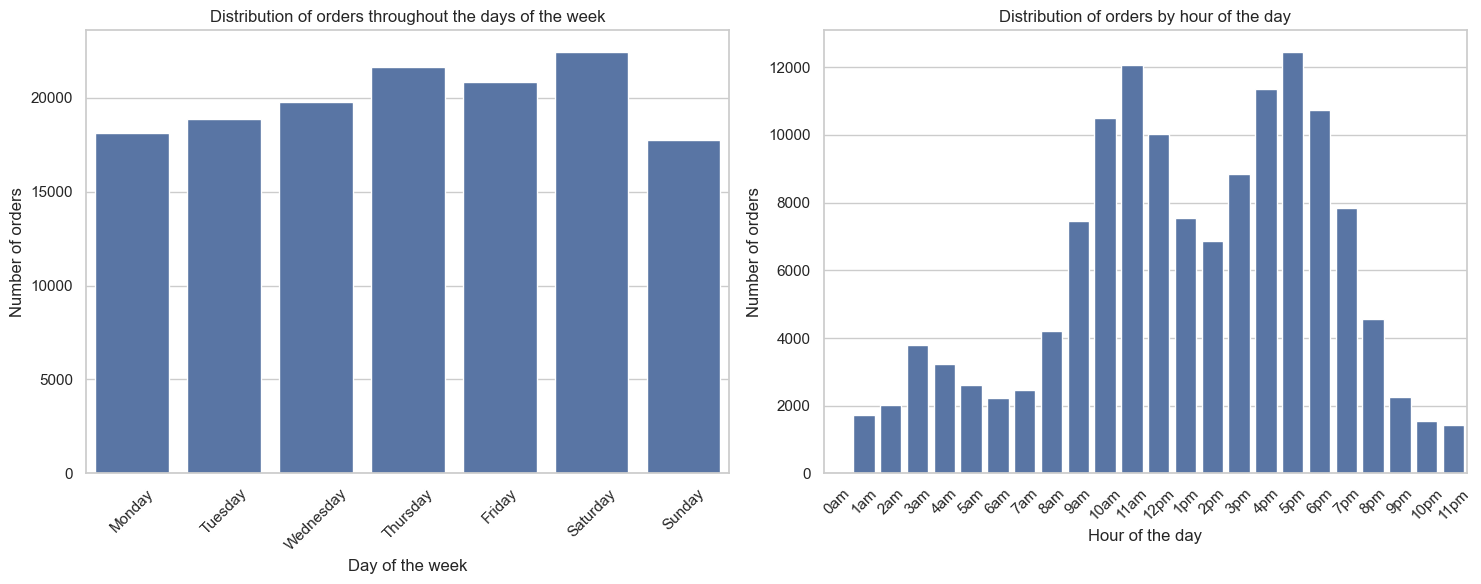

In [24]:
# Create a barplot of the distribution of orders throughout the days of the week
# st theme for the plot
sns.set_theme(style="whitegrid")

# set figsize
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.barplot(data=day_of_order_distribution, x='day_of_the_week', y='Value', ax=ax[0])
sns.barplot(data=hour_of_order_distribution, x='hour_of_the_day', y='Value', ax=ax[1])

# Set titles and labels for the first subplot
ax[0].set_title('Distribution of orders throughout the days of the week')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Number of orders')
ax[0].tick_params(axis='x', rotation=45)

# Set titles and labels for the second subplot
ax[1].set_title('Distribution of orders by hour of the day')
ax[1].set_xlabel('Hour of the day')
ax[1].set_ylabel('Number of orders')
ax[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Check which k
number_col = []
for col in df.columns:
    if isinstance(df[col].iloc[0], (np.float64,np.int64,float,int)):
        if "HR" not in col and "DOW" not in col:
            number_col.append(col)